In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from urllib.request import urlopen

In [3]:
from bs4 import BeautifulSoup

In [4]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [5]:
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

In [9]:
#Get title

title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [10]:
# to print out the text of the webpage

text = soup.get_text()
#print(soup.text)

In [11]:
soup.find_all("a")

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [12]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [13]:
#to print the firdt rows for sanity check


rows = soup.find_all("tr")
print(rows[:10])
type(rows)

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

bs4.element.ResultSet

In [14]:
for row in rows:
    row_td = row.find_all("td")
print(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


In [16]:
#to scrape all the rows, stores it in a list then convert it to a dataframe
listrows = []

for row in rows:
    row_td = row.find_all("td")
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text()
    listrows.append(cleantext)
    
print(cleantext)
#type(cleantext)
#print(row_td)
#type(row_td)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [17]:
listrows

['[]',
 '[Finishers:, 577]',
 '[Male:, 414]',
 '[Female:, 163]',
 '[]',
 '[1, 814, \r\n\r\n                    JARED WILSON\r\n\r\n                , M, TIGARD, OR, 36:21, 36:24, ]',
 '[2, 573, \r\n\r\n                    NATHAN A SUSTERSIC\r\n\r\n                , M, PORTLAND, OR, 36:42, 36:45, \n\r\n                            INTEL TEAM F\r\n                        ]',
 '[3, 687, \r\n\r\n                    FRANCISCO MAYA\r\n\r\n                , M, PORTLAND, OR, 37:44, 37:48, ]',
 '[4, 623, \r\n\r\n                    PAUL MORROW\r\n\r\n                , M, BEAVERTON, OR, 38:34, 38:37, ]',
 '[5, 569, \r\n\r\n                    DEREK G OSBORNE\r\n\r\n                , M, HILLSBORO, OR, 39:21, 39:24, \n\r\n                            INTEL TEAM F\r\n                        ]',
 '[6, 642, \r\n\r\n                    JONATHON TRAN\r\n\r\n                , M, PORTLAND, OR, 39:49, 39:55, ]',
 '[7, 144, \r\n\r\n                    GEORGE TOTONCHY\r\n\r\n                , M, PORTLAND, OR, 

In [18]:
type(listrows)

list

### You can also use regular expression

In [20]:
#import re   #regular expression (re) module

#list_rows = []
#for row in rows:
#    cells = row.find_all("td")
#    str_cells = str(cells)
#    clean = re.compile("    ")
#    clean2 = (re.sub(clean,"", str_cells))
#    list_rows.append(clean2)
#print(clean2)
#type(clean2)

In [21]:
listrows

['[]',
 '[Finishers:, 577]',
 '[Male:, 414]',
 '[Female:, 163]',
 '[]',
 '[1, 814, \r\n\r\n                    JARED WILSON\r\n\r\n                , M, TIGARD, OR, 36:21, 36:24, ]',
 '[2, 573, \r\n\r\n                    NATHAN A SUSTERSIC\r\n\r\n                , M, PORTLAND, OR, 36:42, 36:45, \n\r\n                            INTEL TEAM F\r\n                        ]',
 '[3, 687, \r\n\r\n                    FRANCISCO MAYA\r\n\r\n                , M, PORTLAND, OR, 37:44, 37:48, ]',
 '[4, 623, \r\n\r\n                    PAUL MORROW\r\n\r\n                , M, BEAVERTON, OR, 38:34, 38:37, ]',
 '[5, 569, \r\n\r\n                    DEREK G OSBORNE\r\n\r\n                , M, HILLSBORO, OR, 39:21, 39:24, \n\r\n                            INTEL TEAM F\r\n                        ]',
 '[6, 642, \r\n\r\n                    JONATHON TRAN\r\n\r\n                , M, PORTLAND, OR, 39:49, 39:55, ]',
 '[7, 144, \r\n\r\n                    GEORGE TOTONCHY\r\n\r\n                , M, PORTLAND, OR, 

In [22]:
df = pd.DataFrame(listrows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [23]:
df1 = df[0].str.split(",", expand = True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [24]:
df1[0] = df1[0].str.strip("[")
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [25]:
col_labels = soup.find_all("th")
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Time</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [26]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [27]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [28]:
df3 = df2[0].str.split(",", expand = True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [29]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


In [30]:
df4[1]

0        Bib
0       None
1       577]
2       414]
3       163]
       ...  
577      273
578      467
579      471
580      338
581      443
Name: 1, Length: 583, dtype: object

In [31]:
df4[2] = df4[2].str.replace("\r\n\r\n", "").astype(str)
df4

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,]
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,\n\r\n INTEL TEAM ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [32]:
df4[8] = df4[8].str.replace("\n\r\n", "").astype(str)
df4

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,]
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I\r\n ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [33]:
df4[8]

0                                                  Team]
0                                                   None
1                                                   None
2                                                   None
3                                                   None
                             ...                        
577                                                    ]
578                                 INTEL TEAM I\r\n ...
579                                                    ]
580                                                    ]
581                                                    ]
Name: 8, Length: 583, dtype: object

In [34]:
df4[8] = df4[8].str.replace("\r\n ...", "").astype(str)
df4

C:\Users\kolad\AppData\Local\Temp/ipykernel_7752/3821393602.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df4[8] = df4[8].str.replace("\r\n ...", "").astype(str)


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,]
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [35]:
df5 = df4.rename(columns = df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [36]:
df5

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,]
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      583 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     583 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


In [38]:
df6 = df5.dropna(axis = 0, how = "any")

In [39]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


In [40]:
# inplace = True is used to modify the dataframe df7 instead of creating another dataframe(i mean giving it a variable),
# unlike this one that does not require variable simply because of the inplace parameter 

df7.rename(columns={"[Place" : "Place"}, inplace = True)
df7.rename(columns={" Team]" : "Team"}, inplace = True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


In [41]:
df7["Team"] = df7["Team"].str.strip("]")
df7

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,


In [42]:
(df7[" Time"]) = (df7[" Time"]).str.strip()
df7

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,


In [43]:
(df7[" Time"]).head(20)

5     36:21
6     36:42
7     37:44
8     38:34
9     39:21
10    39:49
11    40:04
12    40:05
13    40:17
14    40:21
15    40:28
16    40:36
17    40:43
18    41:01
19    41:19
20    41:43
21    41:59
22    42:23
23    42:29
24    42:35
Name:  Time, dtype: object

In [44]:
def add_00_to_mm_ss(time_string):
    
    if len(time_string.split(":")) == 2:
        time_string = f"0:{time_string}"
        
    return time_string

times = (df7[" Time"].apply(add_00_to_mm_ss))

print(times)

5      0:36:21
6      0:36:42
7      0:37:44
8      0:38:34
9      0:39:21
        ...   
577    1:38:17
578    1:38:31
579    1:38:32
580    1:40:47
581    1:41:18
Name:  Time, Length: 577, dtype: object


In [45]:
(df7[" Time"]) = times

df7

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,0:36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,0:36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,0:37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,0:38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,0:39:21,39:24,INTEL TEAM F ...
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,


In [46]:
(df7[" Gun Time"]) = (df7[" Gun Time"]).str.strip()

In [47]:
def add_00_to_mm_ss(time_string):
    
    if len(time_string.split(":")) == 2:
        time_string = f"0:{time_string}"
        
    return time_string

timesss = (df7[" Gun Time"].apply(add_00_to_mm_ss))

print(timesss)

5      0:36:24
6      0:36:45
7      0:37:48
8      0:38:37
9      0:39:24
        ...   
577    1:38:34
578    1:40:32
579    1:40:34
580    1:42:01
581    1:42:10
Name:  Gun Time, Length: 577, dtype: object


In [48]:
(df7[" Gun Time"]) = timesss

df7

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,0:36:21,0:36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,0:36:42,0:36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,0:37:44,0:37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,0:38:34,0:38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,0:39:21,0:39:24,INTEL TEAM F ...
...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY ...,F,OTHER,OR,1:38:17,1:38:34,
578,574,467,ROHIT B DSOUZA ...,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I ...
579,575,471,CENITA D'SOUZA ...,F,PORTLAND,OR,1:38:32,1:40:34,
580,576,338,PRANAVI APPANA ...,F,HILLSBORO,OR,1:40:47,1:42:01,


In [52]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 5 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Place      577 non-null    object
 1    Bib       577 non-null    object
 2    Name      577 non-null    object
 3    Gender    577 non-null    object
 4    City      577 non-null    object
 5    State     577 non-null    object
 6    Time      577 non-null    object
 7    Gun Time  577 non-null    object
 8   Team       577 non-null    object
dtypes: object(9)
memory usage: 45.1+ KB


In [56]:
df7.describe()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
count,577,577,577,577,577,577,577,577,577
unique,577,577,576,2,20,9,516,508,24
top,1,814,NO NAME PLS EMAIL TIMER ...,M,PORTLAND,OR,0:55:00,0:50:45,
freq,1,1,2,414,206,551,5,3,497


### what is the average finish time in minutes?

In [59]:
time_list = df7[" Time"].to_list()

# using a for loop to convert "Time" to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(":")
    math = (int(h)*3600 + int(m)*60 + int(s))/60
    time_mins.append(math)
time_mins

[36.35,
 36.7,
 37.733333333333334,
 38.56666666666667,
 39.35,
 39.81666666666667,
 40.06666666666667,
 40.083333333333336,
 40.28333333333333,
 40.35,
 40.46666666666667,
 40.6,
 40.71666666666667,
 41.016666666666666,
 41.31666666666667,
 41.71666666666667,
 41.983333333333334,
 42.38333333333333,
 42.483333333333334,
 42.583333333333336,
 42.6,
 42.61666666666667,
 42.93333333333333,
 43.43333333333333,
 43.45,
 43.666666666666664,
 43.7,
 43.71666666666667,
 43.766666666666666,
 43.766666666666666,
 43.78333333333333,
 43.78333333333333,
 44.06666666666667,
 44.083333333333336,
 44.1,
 44.11666666666667,
 44.38333333333333,
 44.63333333333333,
 44.68333333333333,
 44.7,
 44.8,
 45.05,
 45.083333333333336,
 45.166666666666664,
 45.18333333333333,
 45.18333333333333,
 45.21666666666667,
 45.233333333333334,
 45.25,
 45.28333333333333,
 45.45,
 45.46666666666667,
 45.483333333333334,
 45.6,
 45.6,
 45.666666666666664,
 45.666666666666664,
 45.81666666666667,
 45.916666666666664,
 46.

In [60]:
df7["Runner_mins"] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,0:36:21,0:36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,0:36:42,0:36:45,INTEL TEAM F ...,36.700000
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,0:37:44,0:37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,0:38:34,0:38:37,,38.566667
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,0:39:21,0:39:24,INTEL TEAM F ...,39.350000


In [61]:
df7.describe(include = [np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [63]:
from pylab import rcParams
rcParams["figure.figsize"] = 15, 5

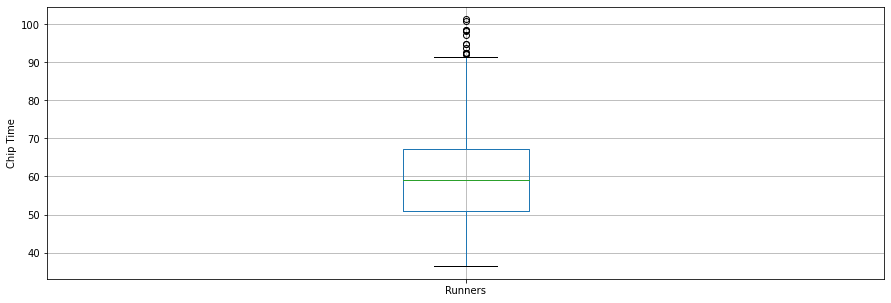

In [68]:
df7.boxplot(column = "Runner_mins")
plt.grid(True, axis = "y")
plt.ylabel("Chip Time")
plt.xticks([1], ["Runners"]);

### Did the runner's finish times follow a normal distribution?

C:\Users\kolad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


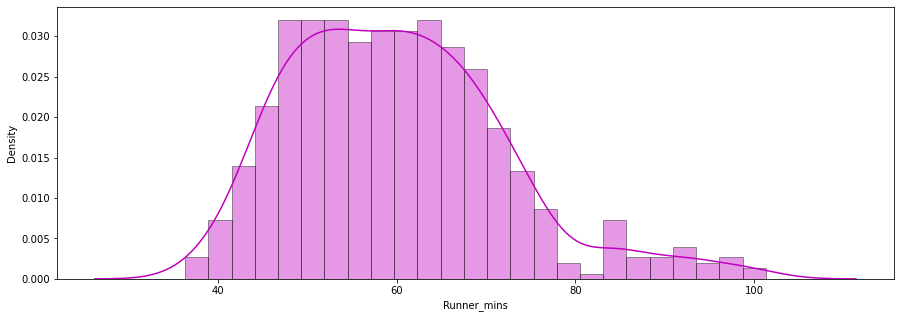

In [69]:
x = df7["Runner_mins"]
ax = sns.distplot(x, hist = True, kde = True, rug = False, color = "m", bins = 25, hist_kws = {"edgecolor" : "black"})
plt.show()